In [5]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats
import pandas as pd;

## Comparison between t-distribution and normal distribution for different sizes of dataset

In [89]:
def get_tcrit(CL, N):
    alpha=1-CL
    return stats.t.ppf(1-alpha/2,N)

Values for uniform distribution:

CL= \[0.68, 0.9, 0.95, 0.99\] </br>
factor= \[1., 1.65, 1.96, 2.58\] </br>

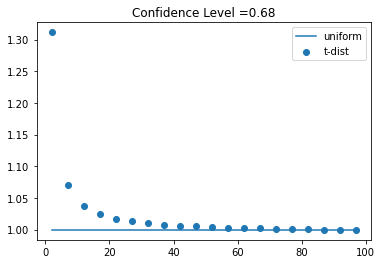

In [108]:
CL= 0.68
nrange= np.arange(2,100,5);
plt.plot(nrange, 1.0 * np.ones(nrange.size), label= "uniform")
t_arr= [];
for n in np.arange(2,100,5):
    t_arr.append(get_tcrit(CL, n))

plt.scatter(nrange, t_arr, label= "t-dist")
plt.title("Confidence Level ="+ str(CL))
plt.legend()

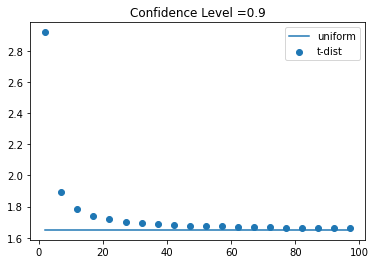

In [109]:
CL= 0.9
nrange= np.arange(2,100,5);
plt.plot(nrange, 1.65 * np.ones(nrange.size), label= "uniform")
t_arr= [];
for n in np.arange(2,100,5):
    t_arr.append(get_tcrit(CL, n))

plt.scatter(nrange, t_arr, label= "t-dist")
plt.title("Confidence Level ="+ str(CL))
plt.legend()

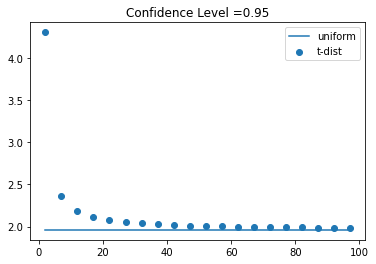

In [110]:
CL= 0.95
nrange= np.arange(2,100,5);
plt.plot(nrange, 1.96 * np.ones(nrange.size), label= "uniform")
t_arr= [];
for n in np.arange(2,100,5):
    t_arr.append(get_tcrit(CL, n))

plt.scatter(nrange, t_arr, label= "t-dist")
plt.title("Confidence Level ="+ str(CL))
plt.legend()

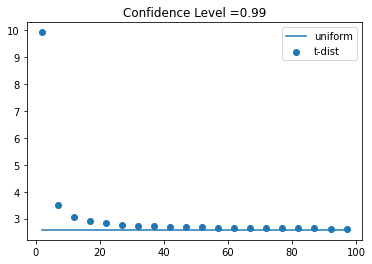

In [112]:
CL= 0.99
nrange= np.arange(2,100,5);
plt.plot(nrange, 2.58 * np.ones(nrange.size), label= "uniform")
t_arr= [];
for n in np.arange(2,100,5):
    t_arr.append(get_tcrit(CL, n))

plt.scatter(nrange, t_arr, label= "t-dist")
plt.title("Confidence Level ="+ str(CL))
plt.legend()

## Confidence intervals

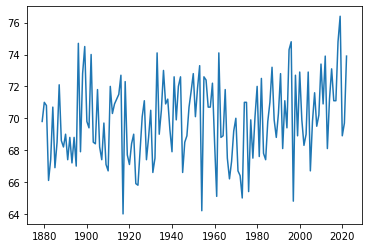

In [140]:
data= pd.read_excel("EAS2655_S2023/matlab/ATL_MonMeanTemp_1879_2022.xlsx", header= 1)

dat= data.iloc[:,:].values

yrs= dat[:,0];
temp_may= dat[:,5];
N= len(yrs)
plt.plot(yrs, temp_may);

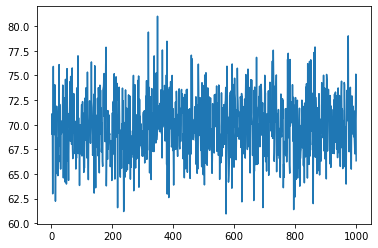

In [243]:
# pseudo data
N= 1000
yrs= np.arange(1,N+1)
temp_may= 70+ 3* np.random.normal(0, 1, size= N) #np.random.rand(N)
plt.plot(yrs, temp_may);

In [244]:
sig=np.std(temp_may,ddof=1)
SE=sig/np.sqrt(N-1)

In [245]:
CL= 0.95;
alpha= 1- CL;

### Normal distribution

In [246]:
upp= mu+ 2* sig/2; #1.96*SE/2
low= mu- 2* sig/2; #1.96*SE/2

In [247]:
ylim= 2*N/(np.max(temp_may)- np.min(temp_may))
print(ylim)

99.76392602352708


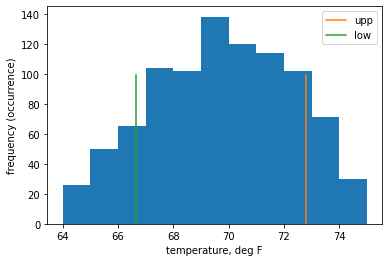

In [248]:
bin=np.arange(64,76,1)
plt.hist(temp_may,bin)
plt.xlabel('temperature, deg F')
plt.ylabel('frequency (occurrence)')
mu= np.mean(temp_may)
# x=np.arange(64,76,0.1)
# y=144*1*1/np.sqrt(2*np.pi)/sig*np.exp(-(x-mu)**2/(2*sig**2))
# plt.plot(x,y)

yrange= np.arange(ylim)
plt.plot(upp*np.ones(np.size(yrange)), yrange, label= "upp")

yrange= np.arange(ylim)
plt.plot(low*np.ones(np.size(yrange)), yrange, label= "low")

plt.legend()
plt.show()

### T-distribution

In [226]:
upp= mu+ get_tcrit(1-alpha/2, N)* sig/2; #t_crit*SE/2
low= mu- get_tcrit(1-alpha/2, N)* sig/2; #t_crit*SE/2

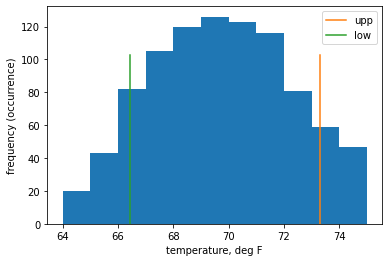

In [235]:
bin=np.arange(64,76,1)
plt.hist(temp_may,bin)
plt.xlabel('temperature, deg F')
plt.ylabel('frequency (occurrence)')
mu= np.mean(temp_may)
# x=np.arange(64,76,0.1)
# y=144*1*1/np.sqrt(2*np.pi)/sig*np.exp(-(x-mu)**2/(2*sig**2))
# plt.plot(x,y)

yrange= np.arange(ylim)
plt.plot(upp*np.ones(np.size(yrange)), yrange, label= "upp")

yrange= np.arange(ylim)
plt.plot(low*np.ones(np.size(yrange)), yrange, label= "low")

plt.legend()
plt.show()